## BOARD & TOOLS

In [1]:
# Basic Libraries 游닄
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Visualization Libraries 游닄
import seaborn as sns

# Machine Learning 丘뙖잺 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## DATA READING

In [2]:
data = pd.read_csv("./data/king_ country_ houses_aa.csv")
df = data.copy()

## DATA INITIAL EXPLORATION /CARACTERIZATION

In [3]:
#Basic exploration

def df_caracterization():
    columns = df.columns.tolist()
    (dfrows,dfcolumns) = df.shape
    df.reset_index()
    print(f'Caracterization:\n')
    print(f'Number of Rows: {dfrows}\n')
    print(f'Number of Columns: {dfcolumns}\n')
    print(f'Columns Names/Variables/Features: {columns}\n')
    df.info()
    print(f'\n Head:\n')
    return df.head(5)

def explore_duplicates():
    duplicates = df.duplicated().sum()
    n_duplicates_percentage = round((duplicates / len(df)) * 100, 2)
    print(f"Percentage of duplicates: {n_duplicates_percentage}%")
    print(f"There are {duplicates} duplicate rows.;")
    
def explore_nan():
    nan_values = df.isna().sum()
    empty_spaces = df.eq(' ').sum()
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    return exploration

In [4]:
df_caracterization()

Caracterization:

Number of Rows: 21613

Number of Columns: 21

Columns Names/Variables/Features: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition    

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [6]:
long_max_lat_max = df.loc[df['lat'].idxmax(), 'long']
long_max_lat_max

-122.384

In [7]:
df["lat"].max()

47.7776

In [8]:
long_min_lat_max = df.loc[df['lat'].idxmin(), 'long']

In [9]:
long_min_lat_max 

-121.646

In [10]:
df["lat"].min()

47.1559

In [11]:
explore_duplicates()

Percentage of duplicates: 0.0%
There are 0 duplicate rows.;


In [12]:
explore_nan()

NaN  EmptySpaces
id               0            0
date             0            0
price            0            0
bedrooms         0            0
bathrooms        0            0
sqft_living      0            0
sqft_lot         0            0
floors           0            0
waterfront       0            0
view             0            0
condition        0            0
grade            0            0
sqft_above       0            0
sqft_basement    0            0
yr_built         0            0
yr_renovated     0            0
zipcode          0            0
lat              0            0
long             0            0
sqft_living15    0            0
sqft_lot15       0            0

# DATA CLEANING

STANDARIZATION & DATA SELECTION

    - Formatting to lower.case columns and clean empty spaces 
    - Remove empty columns and unname columns and others with non- relevant information. 
    - Remove all empty rows. #No necesary
    - unnamed columns #No necesary 

No necesary any of kind of standarization and in this case.
    
DATA CLEANING AND TRANSFORMATION

    - Data exploration for inconsistences. #No necesary 
    - Data cleaning: unintelligible and inconsistent data. #No necesary
    - Cleaning nulls and duplicates #No necesary
    - Transformation and reorder columns 
    - Moving the target to the right. 
    
 We need to follow only the two last points. 

## Transformation and reorder columns 

In [13]:
df.nunique().sort_values(ascending=False)

id               21436
sqft_lot          9782
sqft_lot15        8689
lat               5034
price             4028
sqft_living       1038
sqft_above         946
sqft_living15      777
long               752
date               372
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
bathrooms           30
bedrooms            13
grade               12
floors               6
view                 5
condition            5
waterfront           2
dtype: int64

In [16]:
df['date'] = df['date'].astype(str).str.split('T', expand=True)[0]


In [17]:
df["zipcode"].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [18]:
df_caracterization()

Caracterization:

Number of Rows: 21613

Number of Columns: 21

Columns Names/Variables/Features: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition    

id      date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  20141013  221900.0         3       1.00         1180      5650   
1  6414100192  20141209  538000.0         3       2.25         2570      7242   
2  5631500400  20150225  180000.0         2       1.00          770     10000   
3  2487200875  20141209  604000.0         4       3.00         1960      5000   
4  1954400510  20150218  510000.0         3       2.00         1680      8080   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     2.0           0     0  ...      7        2170            400      1951   
2     1.0           0     0  ...      6         770              0      1933   
3     1.0           0     0  ...      7        1050            910      1965   
4     1.0           0     0  ...      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [19]:
target = df.pop("price")
df.insert(len(df.columns), "price", target)

In [20]:
df

id      date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  20141013         3       1.00         1180      5650   
1      6414100192  20141209         3       2.25         2570      7242   
2      5631500400  20150225         2       1.00          770     10000   
3      2487200875  20141209         4       3.00         1960      5000   
4      1954400510  20150218         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21608   263000018  20140521         3       2.50         1530      1131   
21609  6600060120  20150223         4       2.50         2310      5813   
21610  1523300141  20140623         2       0.75         1020      1350   
21611   291310100  20150116         3       2.50         1600      2388   
21612  1523300157  20141015         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0         1.0           0     0          3  ...        1180              0   
1         2.0           0     0          3  ...        2170            400   
2         1.0           0     0          3  ...         770              0   
3         1.0           0     0          5  ...        1050            910   
4         1.0           0     0          3  ...        1680              0   
...       ...         ...   ...        ...  ...         ...            ...   
21608     3.0           0     0          3  ...        1530              0   
21609     2.0           0     0          3  ...        2310              0   
21610     2.0           0     0          3  ...        1020              0   
21611     2.0           0     0          3  ...        1600              0   
21612     2.0           0     0          3  ...        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21608      2009             0    98103  47.6993 -122.346           1530   
21609      2014             0    98146  47.5107 -122.362           1830   
21610      2009             0    98144  47.5944 -122.299           1020   
21611      2004             0    98027  47.5345 -122.069           1410   
21612      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15     price  
0            5650  221900.0  
1            7639  538000.0  
2            8062  180000.0  
3            5000  604000.0  
4            7503  510000.0  
...           ...       ...  
21608        1509  360000.0  
21609        7200  400000.0  
21610        2007  402101.0  
21611        1287  400000.0  
21612        1357  325000.0  

[21613 rows x 21 columns]

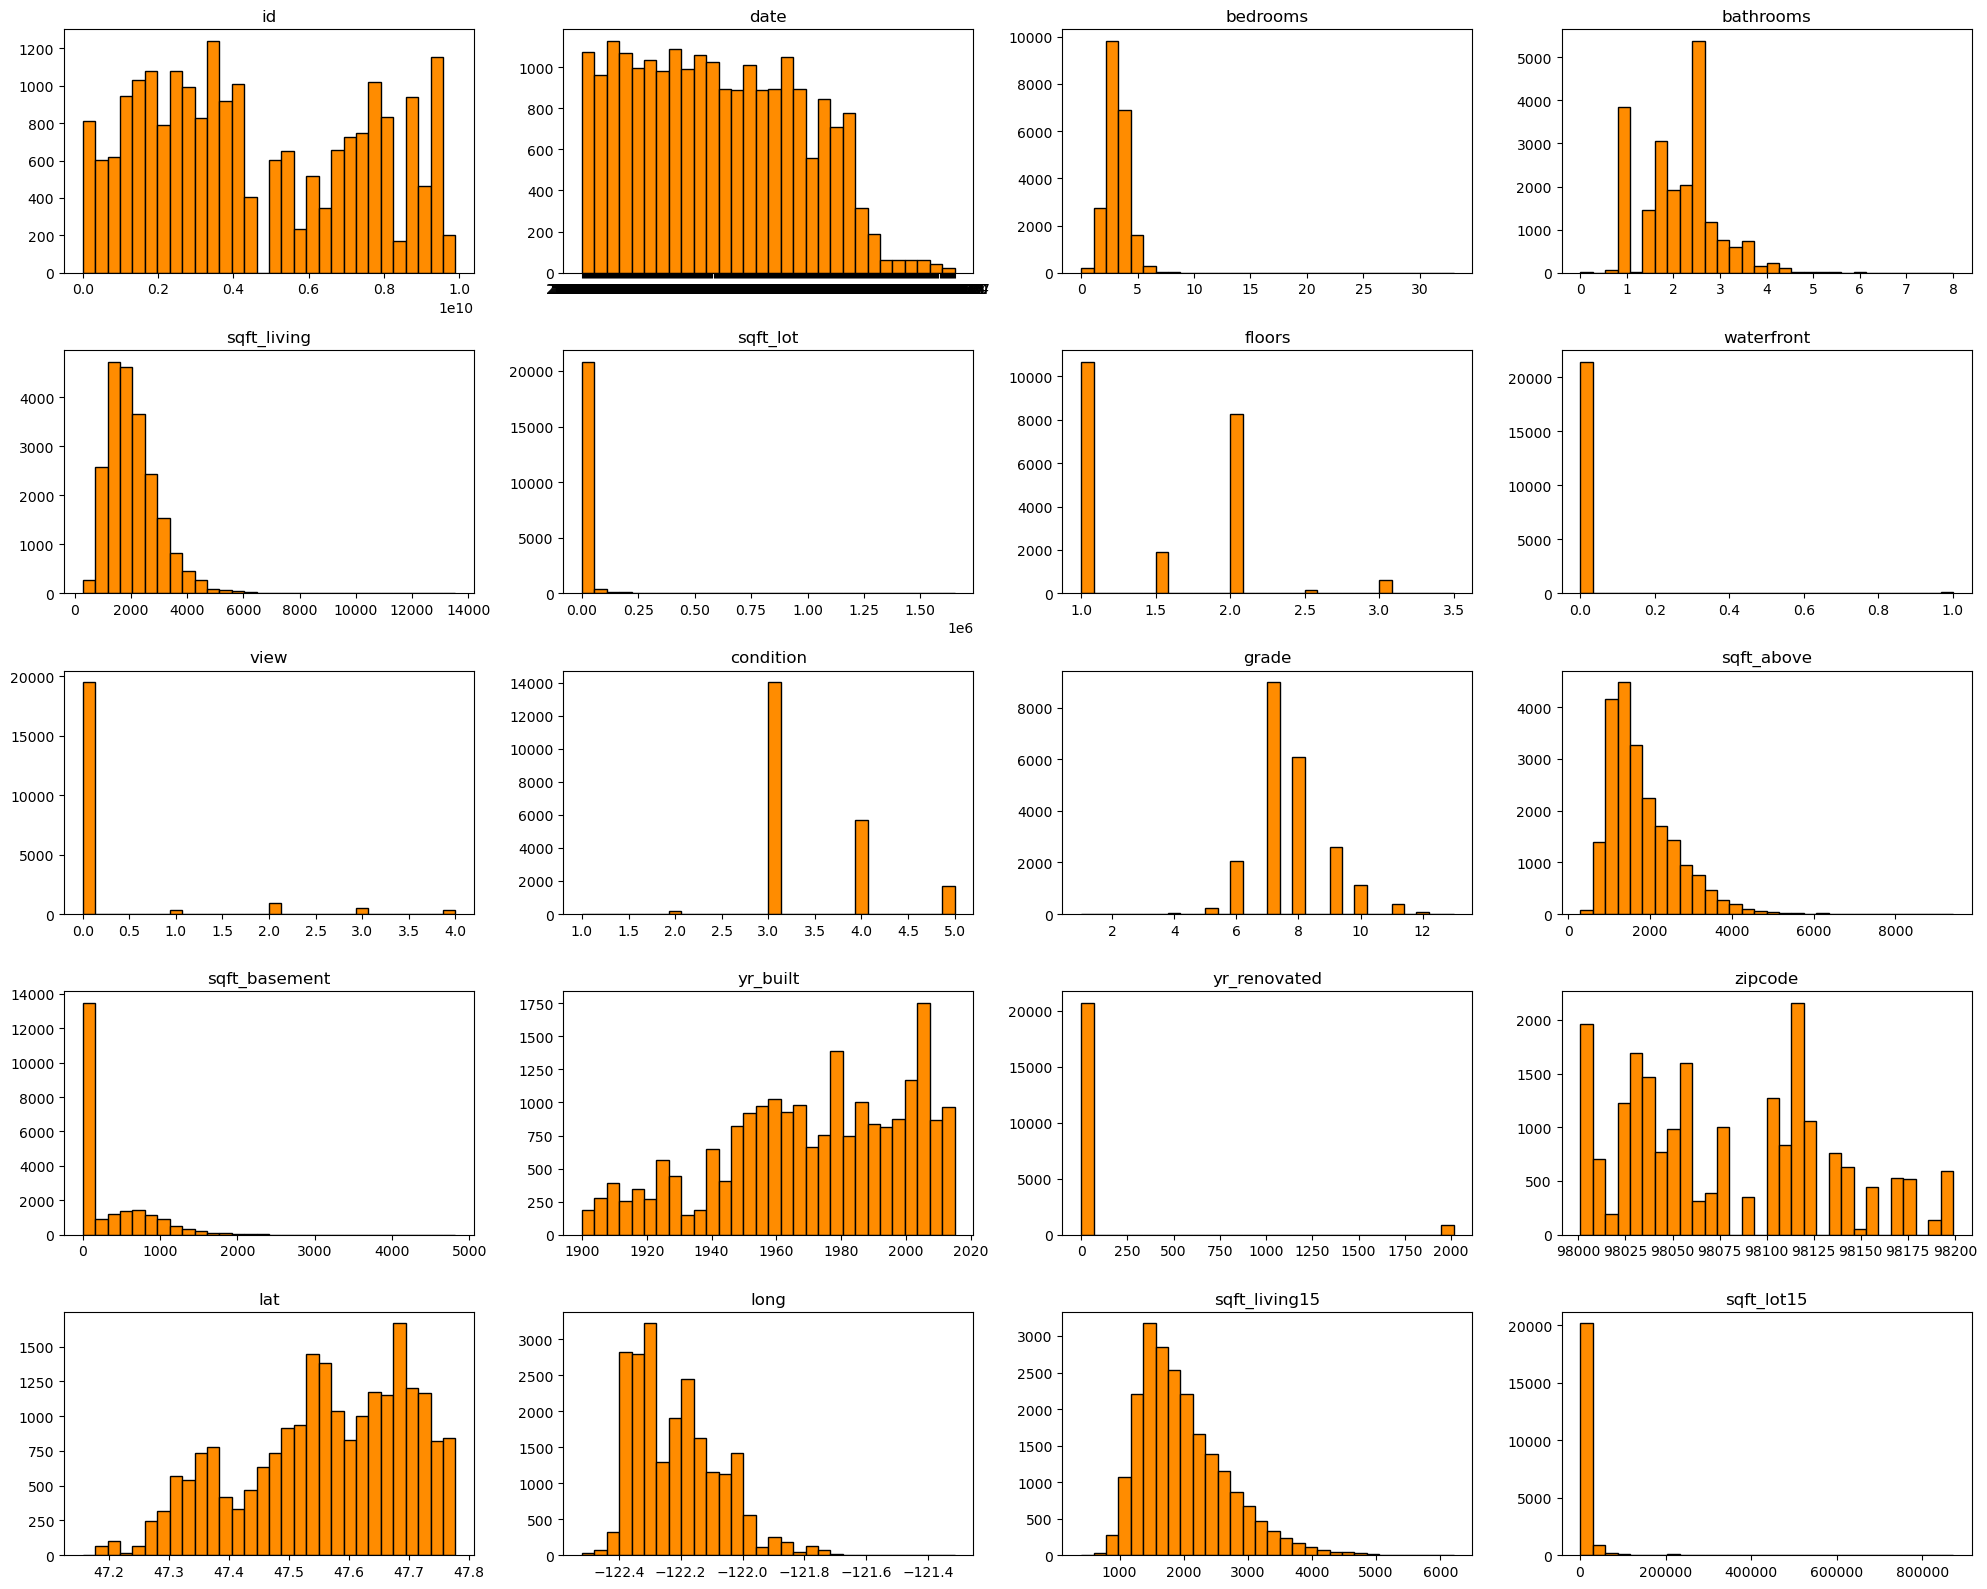

In [21]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

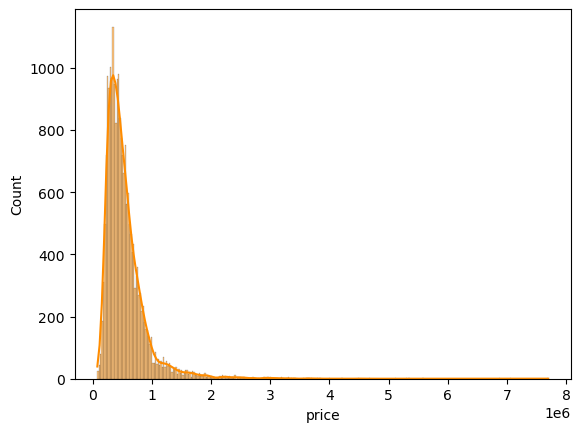

In [22]:
sns.histplot(df["price"], color=color, kde=True);

In [31]:
df2 = df.drop(columns = ["id", "date"])

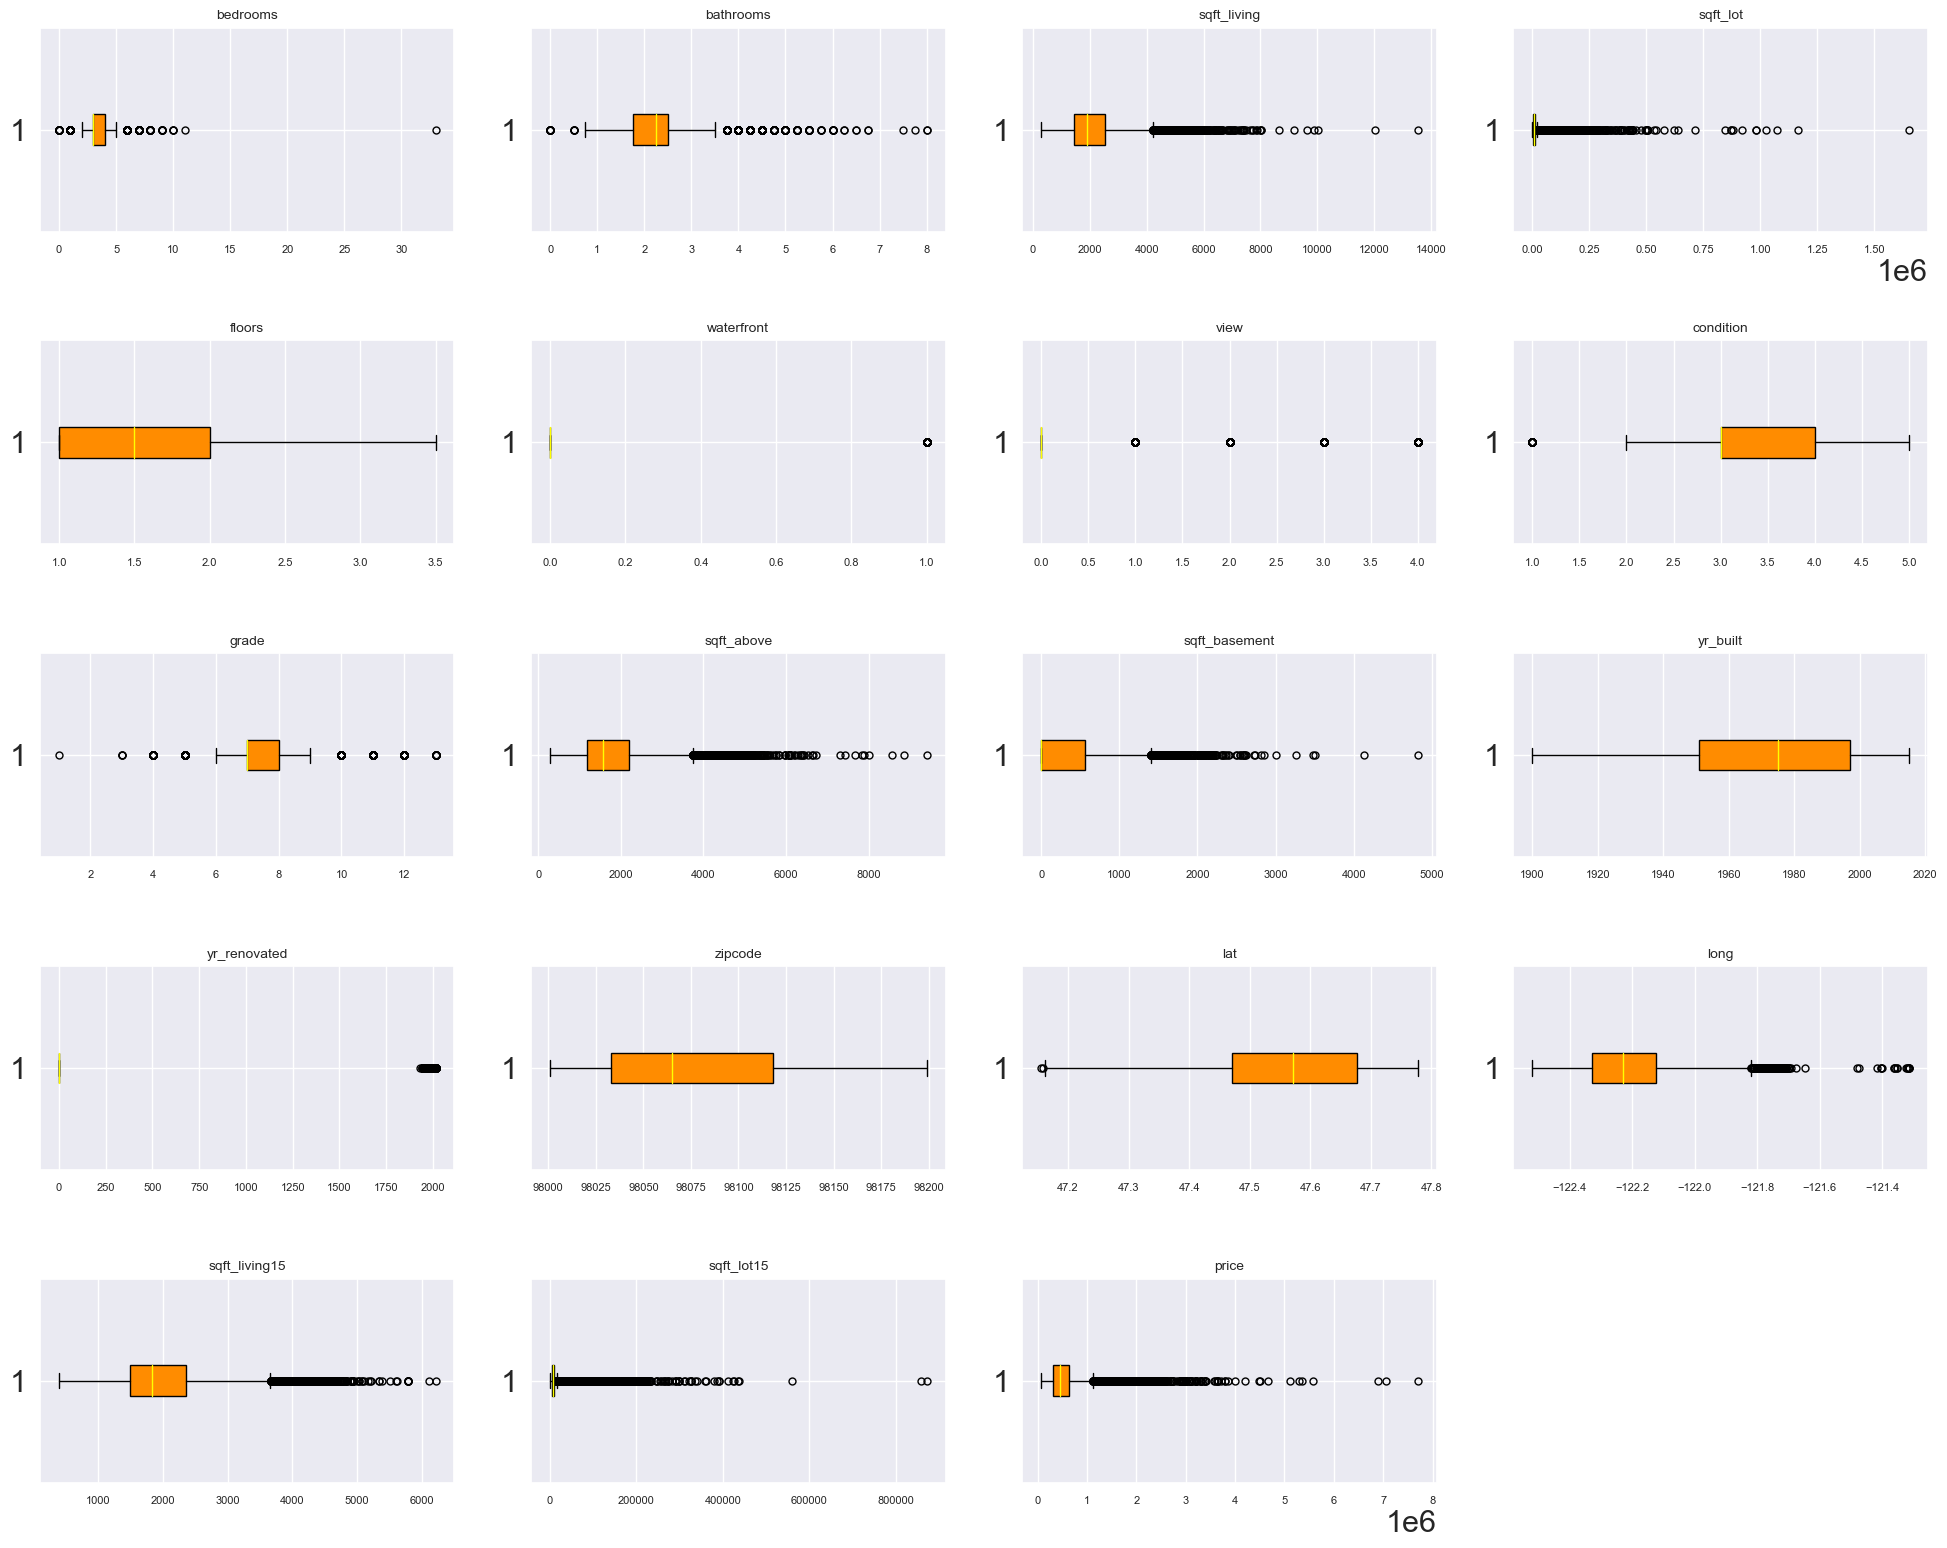

In [33]:
# Definir el color para los boxplots
color = '#FF8C00'

# Definir el tama침o de la cuadr칤cula
nrows, ncols = 5, 4

# Crear una figura y subtramas
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

# Aplanar las subtramas en una sola lista
axes = axes.flatten()

# Iterar sobre cada subtrama y dibujar el boxplot para cada columna del DataFrame
for i, ax in enumerate(axes):
    # Verificar si el 칤ndice es mayor o igual al n칰mero de columnas en el DataFrame
    if i >= len(df2.columns):
        ax.set_visible(False)  # Ocultar la subtrama si est치 fuera del rango de las columnas
        continue
    # Dibujar el boxplot para la columna actual
    ax.boxplot(df2.iloc[:, i].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df2.columns[i], fontsize=10)  # Establecer el t칤tulo de la subtrama como el nombre de la columna
    ax.tick_params(axis='x', labelsize=8)  # Ajustar el tama침o de las etiquetas del eje x

plt.tight_layout()  # Ajustar el dise침o de la figura
plt.show()  # Mostrar el gr치fico


SyntaxError: invalid syntax (354974103.py, line 1)

In [25]:
df2.corrwith(df2["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
dtype: float64

In [26]:
num_corr = round(df2.corr(), 2)

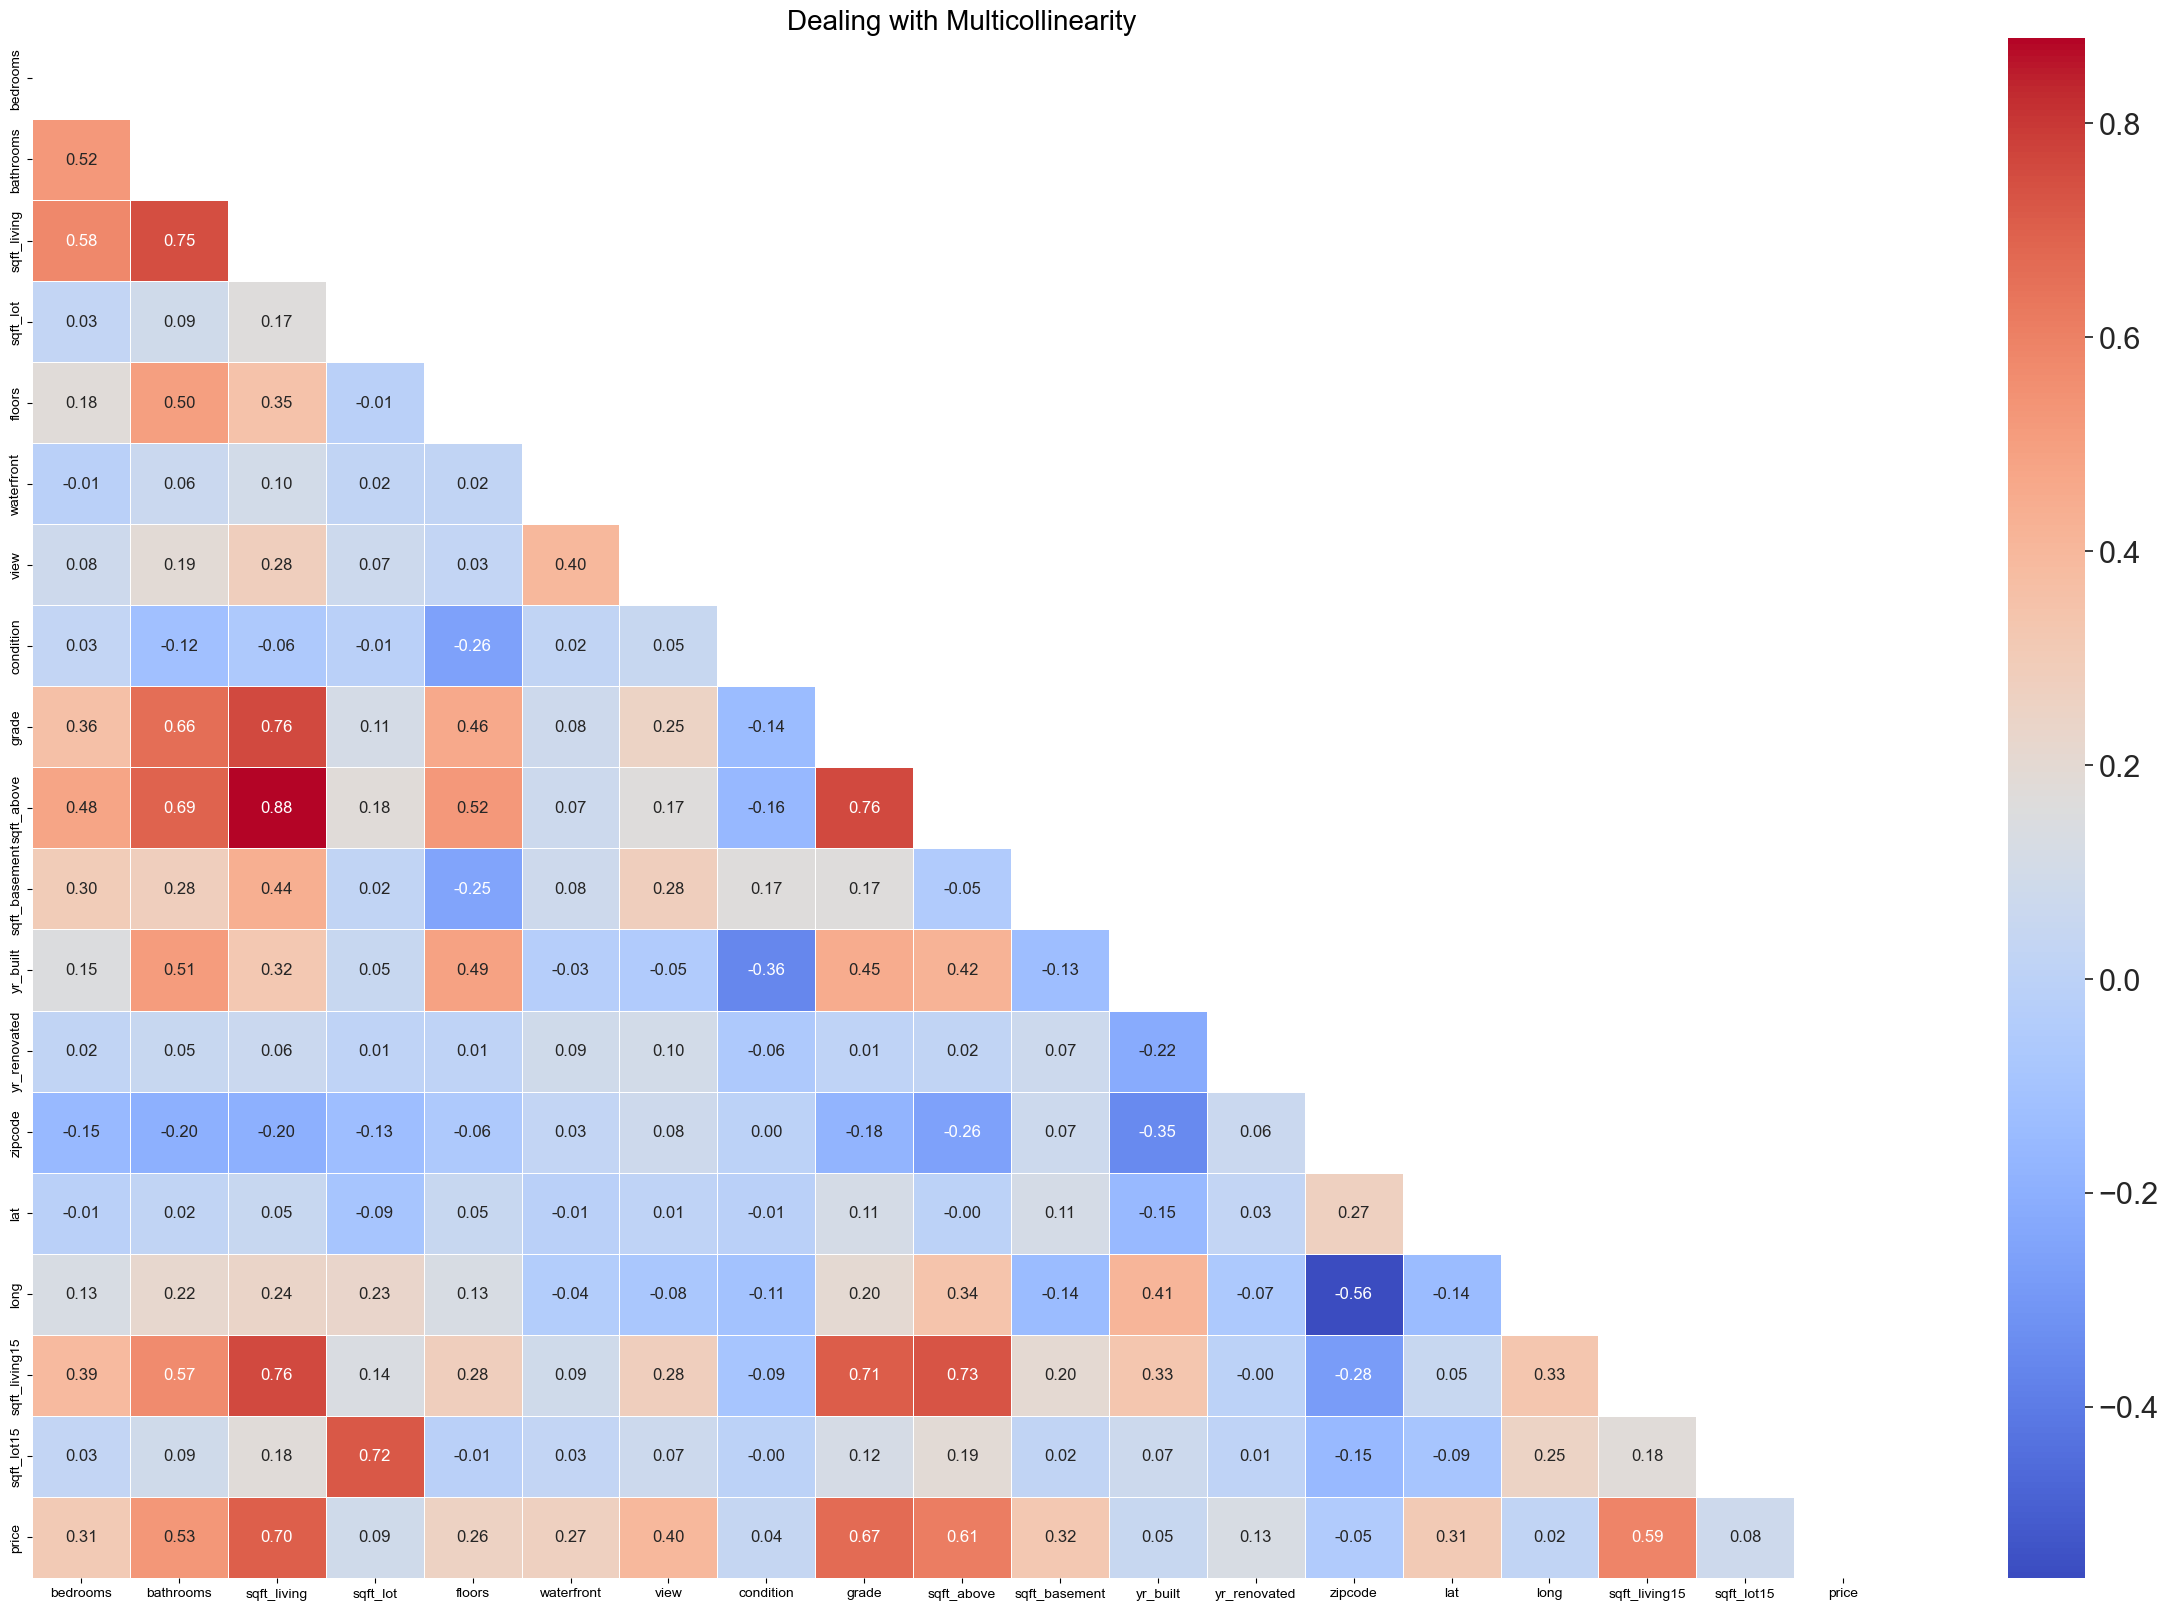

In [27]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(30, 20))
sns.set(font_scale=2) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

1. Opci칩n de eliminaci칩n: 
    Multicolinearidad = sqt_above, grade, sqt_living
    Unnecesary = condition, yr_built, long
    
2. Opci칩n 2 de eliminacion (Add):
    Multicolinearidad = sqft_living15
    Unnecesary = yr_built
    
3. Opci칩n 3 de eliminaci칩n(Change and add):
    Test return sqt_above, pull out sqt_living and sqt_living15
    Unnecesary = zipcode
Detalles importantes: 
    Lat tiene relevancia

In [28]:
X = df2.drop("price", axis=1)
y = df2["price"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)